cluster Numbers =  7
finish all in 14.848703


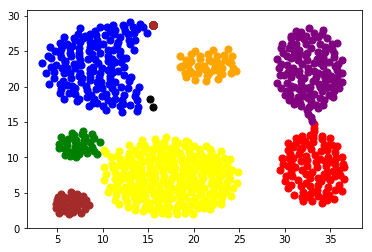

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

UNCLASSIFIED = False
NOISE = 0

def loadDataSet(fileName, splitChar = '\t'):
    dataSet = []
    with open(fileName) as fr:
        for line in fr.readlines():
            curline = line.strip().split(splitChar)
               fltline = list(map(float, curline))
            dataSet.append(fltline)
        return dataSet
    
def dist(a, b):
    return math.sqrt(np.power(a - b, 2).sum())

def eps_neighbor(a,b,eps):
    return dist(a,b) < eps

def region_query(data, pointId, eps):
    """返回一个点的临近的点的list"""
    nPoints = data.shape[1]  # 所有点的个数
    seeds = []
    for i in range(nPoints):  # 遍历所有点
        if eps_neighbor(data[:,pointId],data[:,i],eps):  # 若临近，则将其挑出
            seeds.append(i)
    return seeds

def expand_cluster(data, clusterResult, pointId, clusterId, eps, minPts):
    seeds = region_query(data, pointId, eps)  # 找到距离该点最近的点
    if len(seeds) < minPts:  # 若最近的点的个数小于支持度
        clusterResult[pointId] = NOISE  # 则将其判断为噪声
    else:  # 否则
        clusterResult[pointId] = clusterId  # 否则将其判断为cluster序号为clusterId的簇内的点
        for seedId in seeds:  # 把这个点附近的点
            clusterResult[seedId] = clusterId  # 也算到这个cluster里

        while len(seeds) > 0:  # 遍历每一个附近的点
            currentPoint = seeds[0] # 把它设置为当前点
            queryResults = region_query(data, currentPoint, eps)  # 再次寻找临近的点
            if len(queryResults) >= minPts:  # 若其邻近的点个数大于支持度
                for i in range(len(queryResults)):  # 遍历临近点
                    resultPoint = queryResults[i]
                    if clusterResult[resultPoint] == UNCLASSIFIED:  # 若还没有被分到某个簇中，且不是噪声
                        seeds.append(resultPoint)  # 则将其加入seeds中
                        clusterResult[resultPoint] = clusterId  # 将其加入当前的簇中
                    elif clusterResult[resultPoint] == NOISE: 
                        clusterResult[resultPoint] = clusterId  # 否则，仅将其将入当前簇中
            seeds = seeds[1:] # pop出前面使用过的seed
        return True

def dbscan(data, eps, minPts):
    """data: 数据集
       eps: 半径
       minPts: 最小支持度
   """ 
    clusterId = 1  # 簇编号
    nPoints = data.shape[1]  # 点的总个数
    clusterResult = [UNCLASSIFIED] * nPoints
    for pointId in range(nPoints):
        point = data[:,pointId]
        if clusterResult[pointId] == UNCLASSIFIED:# 感觉这个判断没什么用
            if expand_cluster(data, clusterResult, pointId, clusterId, eps, minPts):
                clusterId = clusterId + 1
    return clusterResult, clusterId - 1

def plotFeature(data, clusters, clusterNum):
    nPoints = data.shape[1]
    matClusters = np.mat(clusters).transpose()
    fig = plt.figure()
    scatterColors = ['black','blue','green','yellow','red','purple','orange','brown']
    ax = fig.add_subplot(111)
    for i in range(clusterNum + 1):
        colorStyle = scatterColors[i % len(scatterColors)]
        subCluster = data[:, np.nonzero(matClusters[:,0].A == i)]
        ax.scatter(subCluster[0,:].flatten().A[0], subCluster[1,:].flatten().A[0],c = colorStyle, s = 50)

def main():
    dataSet = loadDataSet('points.txt',splitChar=',')
    dataSet = np.mat(dataSet).transpose()
    clusters, clusterNum = dbscan(dataSet, 2, 15)
    print 'cluster Numbers = ', clusterNum
    plotFeature(dataSet, clusters, clusterNum)
    
if __name__ == '__main__':
    start = time.clock()
    main()
    end = time.clock()
    print 'finish all in %s' % str(end - start)
    plt.show()